<a href="https://colab.research.google.com/github/drssharma/Diabetes_Prediction/blob/main/Diabetes_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Prediction Using Machine Learning 

Step1: Importing all the necessary libraries

In [505]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Step 2: Reading the dataset:

In [506]:
data = pd.read_csv('/content/diabetes.csv')

Analysing the dataset:

In [507]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [508]:
data.shape

(768, 9)

In [509]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [510]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing Value Analysis

In [511]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Inspecting for balanced dataset:

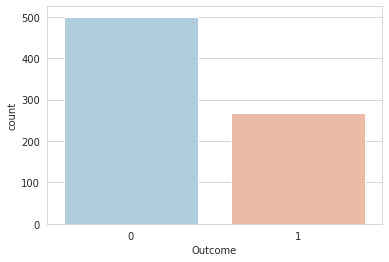

In [512]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=data, palette='RdBu_r')

In [513]:
#we can see that there are 500 non diabetic counts and 268 diabetic counts. The ratio between non diabetics and diabetic is almost 1:2, but still this data is not imbalanced. 
# Grouping the data in terms of Non-diabetican and Diabetic cases.
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Seprating the Data and Target column:


In [514]:
X = data.drop(columns='Outcome',axis=1)
Y = data['Outcome']

In [515]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [516]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization:

In [517]:
Scaler = StandardScaler()

In [518]:
Scaler.fit(X)

StandardScaler()

In [519]:
Norm_data = Scaler.transform(X)

In [520]:
print(Norm_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [521]:
X = Norm_data

Train Test split:

In [522]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [523]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model:

In [524]:
classifier = svm.SVC(kernel='linear',C=1.0)

In [525]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation:

Accuracy Score

In [526]:
# accuracy score on the training data
X_train_prediction= classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [527]:
print('Accuracy Score of the training data:', training_data_accuracy)

Accuracy Score of the training data: 0.7866449511400652


In [528]:
# accuracy score on the test data
X_test_prediction= classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [529]:
print('Accuracy Score of the test data:', test_data_accuracy)

Accuracy Score of the test data: 0.7727272727272727


Making a predictive system

In [530]:
input_data=(6,134,80,37,370,46.2,0.238,46)
#changing the input data to numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshaping the data as we are predicting only for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input 

std_data = Scaler.transform(input_data_reshaped)
print(std_data)


[[ 0.63994726  0.41016376  0.56322275  1.03272605  2.51978092  1.80319526
  -0.70633419  1.08564439]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [531]:
prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0]==0):
  print('person is not diabetic')
else:
    print('person is diabetic')

[1]
person is diabetic
